In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Dataset Discription
___

Dataset : Seeds  
Obtained from kaggle https://www.kaggle.com/datasets/rwzhang/seeds-dataset  
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment.  
Has 10 columns (All except 'Unnamed: 8' and 'Unnamed: 9' used in this prediction)

In [2]:
# Read the data from the csv file
df_rawData = pd.read_csv('seeds_dataset.csv')
# 'Class (1, 2, 3)' would be our target.

In [3]:
# Checking to see how many rows we have in this dataset
df_rawData.shape[0]

210

In [4]:
df_rawData

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,NaN,NaN
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,NaN,NaN
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,NaN,NaN
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,NaN,NaN


### Clean and re-Organize Data
Drop 'Unnamed: 8' and 'Unnamed: 9'  
Change 'Class (1, 2, 3)' to 'Variety'  
___

In [5]:
# Drop unwanted columns
df_rawData = df_rawData.drop(['Unnamed: 8', 'Unnamed: 9'], axis='columns')

In [6]:
# Rename the variety column
df_rawData = df_rawData.rename(columns={'Class (1, 2, 3)': 'Variety'})

In [7]:
df_rawData.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [8]:
# Find out the unique quality levels in the dataset.
df_rawData['Variety'].unique()

array([1, 2, 3], dtype=int64)

## Comparing the seeds


In [9]:
# Demonstration of data slicing
df0 = df_rawData[:70]
df1 = df_rawData[70:140]
df2 = df_rawData[140:]


In [10]:
df0

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
65,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,1
66,14.34,14.37,0.8726,5.630,3.190,1.313,5.150,1
67,14.01,14.29,0.8625,5.609,3.158,2.217,5.132,1
68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300,1


In [11]:
df1

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
70,17.63,15.98,0.8673,6.191,3.561,4.076,6.060,2
71,16.84,15.67,0.8623,5.998,3.484,4.675,5.877,2
72,17.26,15.73,0.8763,5.978,3.594,4.539,5.791,2
73,19.11,16.26,0.9081,6.154,3.930,2.936,6.079,2
74,16.82,15.51,0.8786,6.017,3.486,4.004,5.841,2
...,...,...,...,...,...,...,...,...
135,15.38,14.66,0.8990,5.477,3.465,3.600,5.439,2
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,2
137,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,2
138,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,2


In [12]:
df2

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
140,13.07,13.92,0.8480,5.472,2.994,5.304,5.395,3
141,13.32,13.94,0.8613,5.541,3.073,7.035,5.440,3
142,13.34,13.95,0.8620,5.389,3.074,5.995,5.307,3
143,12.22,13.32,0.8652,5.224,2.967,5.469,5.221,3
144,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,3
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## Data Filtering
___

In [13]:
Kama_data = df_rawData[df_rawData['Variety'] == 1]

Kama_data

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
65,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,1
66,14.34,14.37,0.8726,5.630,3.190,1.313,5.150,1
67,14.01,14.29,0.8625,5.609,3.158,2.217,5.132,1
68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300,1


In [14]:
Rosa_data = df_rawData[df_rawData['Variety'] == 2]

Rosa_data

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
70,17.63,15.98,0.8673,6.191,3.561,4.076,6.060,2
71,16.84,15.67,0.8623,5.998,3.484,4.675,5.877,2
72,17.26,15.73,0.8763,5.978,3.594,4.539,5.791,2
73,19.11,16.26,0.9081,6.154,3.930,2.936,6.079,2
74,16.82,15.51,0.8786,6.017,3.486,4.004,5.841,2
...,...,...,...,...,...,...,...,...
135,15.38,14.66,0.8990,5.477,3.465,3.600,5.439,2
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,2
137,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,2
138,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,2


In [15]:
Canadian_data = df_rawData[df_rawData['Variety'] == 3]

Canadian_data


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
140,13.07,13.92,0.8480,5.472,2.994,5.304,5.395,3
141,13.32,13.94,0.8613,5.541,3.073,7.035,5.440,3
142,13.34,13.95,0.8620,5.389,3.074,5.995,5.307,3
143,12.22,13.32,0.8652,5.224,2.967,5.469,5.221,3
144,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,3
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


The targets have now been sliced and stored into variables


### 'Asymmetry coefficient'  vs 'Area' (Scatter Plot)

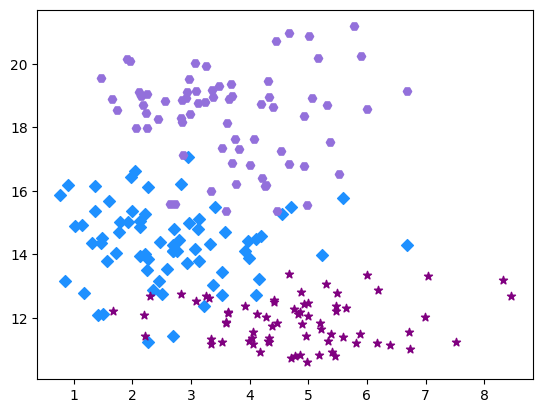

In [16]:
##  Now we create a scatter plot for  data visualization that displays individual data points 


plt.scatter(Kama_data['Asymmetry coefficient'], Kama_data['Area'], color="dodgerblue",marker='D')

plt.scatter(Rosa_data['Asymmetry coefficient'], Rosa_data['Area'],color="mediumpurple",marker='H')

plt.scatter(Canadian_data['Asymmetry coefficient'], Canadian_data['Area'],color="purple",marker='*')


### Another Test 

### 'Compactness' vs 'Length of kernel groove' (Scatter Plot)

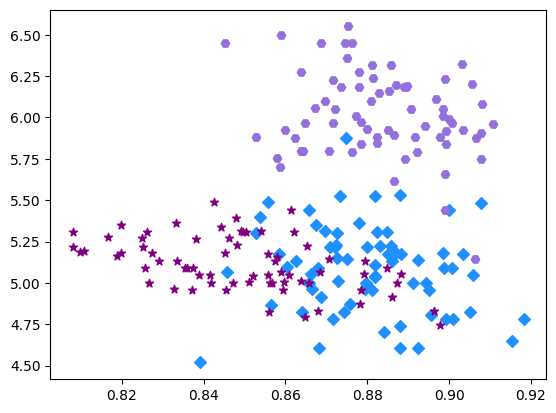

In [17]:
##  Now we create a scatter plot for  data visualization that displays individual data points 


plt.scatter(Kama_data['Compactness'], Kama_data['Length of kernel groove'], color="dodgerblue",marker='D')

plt.scatter(Rosa_data['Compactness'], Rosa_data['Length of kernel groove'],color="mediumpurple",marker='H')

plt.scatter(Canadian_data['Compactness'], Canadian_data['Length of kernel groove'],color="purple",marker='*')


**Train Test Split**
___

In [18]:
# Divide data into training and testing using Sklearn version
from sklearn.model_selection import train_test_split

In [19]:
# Drop the column from the dataset 
X = df_rawData.drop(['Variety'], axis='columns')
# Create a table of just the Classifications. 
y = df_rawData.Variety

In [20]:
# Loading the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [21]:
# Training data
len(X_train)

168

In [22]:
#Test data
len(X_test)

42

### Create KNN (K Nearest Neighbour Classifier)
___

In [23]:
# Create a knn classifier object (K = 11)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

In [24]:
# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [25]:
# Calculate the accuracy
knn.score(X_test, y_test)

0.8809523809523809

### Predicting the value of K

In [26]:
""" Here we test with our own data. 
Output is 3 meaning these values belong to the 3rd variety with a value of 3 (index 140)
"""
knn.predict([[13.07, 13.92, 0.8480, 5.472, 2.994, 5.304, 5.395]])

c:\Users\edemq\Python3114\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [27]:
""" Here we test with our own data again with random values. 
Based on these random values, the machine predicts that these are seed features that belong to the 2nd Variety (2)
"""

knn.predict([[17.07, 12.92, 2.8480, 8.472, 9.994, 8.304, 2.395]])

c:\Users\edemq\Python3114\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

**Plot Confusion Matrix**
___

In [28]:
"""
Predict and store them in a variable. 
"""
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  2,  3],
       [ 0,  9,  0],
       [ 0,  0, 13]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

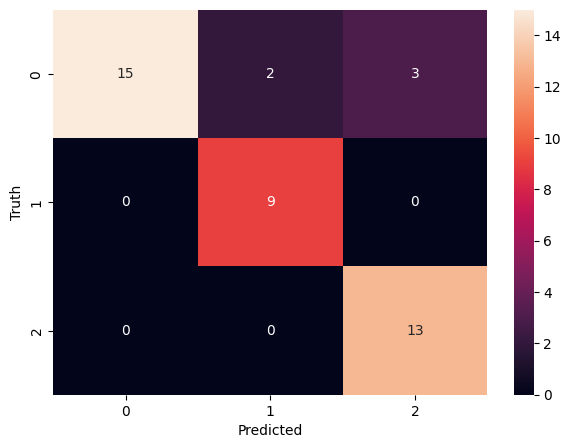

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Print classification report for precesion, recall and f1-score for each classes**
___

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86        20
           2       0.82      1.00      0.90         9
           3       0.81      1.00      0.90        13

    accuracy                           0.88        42
   macro avg       0.88      0.92      0.88        42
weighted avg       0.90      0.88      0.88        42



## Experimenting with the data
___

### Experiment 1: Testing different ratios for split portions

Study the effect of different training/testing split portions on your data (like 80/20 training/testing split) 

In [31]:
# Divide data into training and testing using Sklearn
from sklearn.model_selection import train_test_split

In [32]:
knn = KNeighborsClassifier(n_neighbors=11)

In [33]:
# Drop the column from the dataset 
X = df_rawData.drop(['Variety'], axis='columns')
# Create a table of just the Classifications. 
y = df_rawData.Variety

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.6, random_state= 1)

In [35]:
len(X_train)

84

In [36]:
len(X_test)

126

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [38]:
knn.score(X_test, y_test)

0.9365079365079365

In [39]:
"""
Predict and store them in a variable. 
"""
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  2,  4],
       [ 2, 37,  0],
       [ 0,  0, 47]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

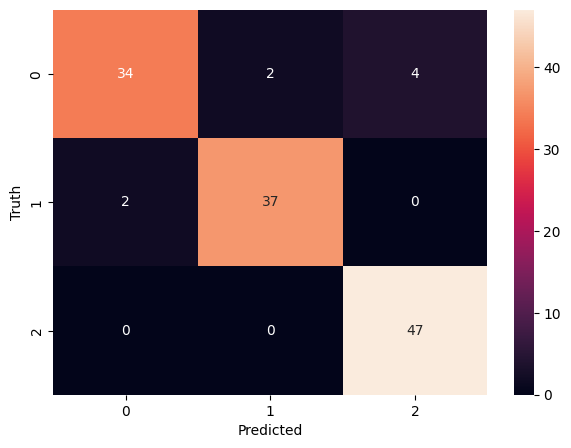

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
from sklearn.metrics import classification_report
#Create a Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.85      0.89        40
           2       0.95      0.95      0.95        39
           3       0.92      1.00      0.96        47

    accuracy                           0.94       126
   macro avg       0.94      0.93      0.93       126
weighted avg       0.94      0.94      0.94       126



## Testing out K-Fold approach
___

In [42]:
# Import the KFold library
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [43]:
""" 
Load the data: Already loaded in the previous tasks.
X = df_rawData.drop(['Variety'], axis='columns')
y = df_rawData.Variety
"""

# Create a KFold object with the number of folds (5)
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=1)

In [44]:
# Create a new KNeighbourClassifier object
model_knn = KNeighborsClassifier(n_neighbors=5)

In [45]:
# This function splits, trains and evaluates the data. 
scores = cross_val_score(model_knn, X, y, cv=kfold)

In [46]:
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation of Scores:", np.std(scores))

Cross-Validation Scores: [0.85714286 0.92857143 0.95238095 0.83333333 0.85714286]
Mean Score: 0.8857142857142858
Standard Deviation of Scores: 0.04616837959444122


___

# THANK YOU

### Members:  
1. Catarina Kaucher​
2. Sara Sofia Paananen​​
3. Edem Quashigah ​